<a href="https://colab.research.google.com/github/tasosnikitakis/Linnear_Regression_SciKit_Learn/blob/main/Linear_Regression_with_Pandas_and_SciKit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [5]:
#Load the data and add the target data (blood sugar levels)
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df["target"] = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [6]:
#Split the data into X and Y
X = diabetes_df.drop("target", axis=1)
y = diabetes_df["target"]
X.shape, y.shape

((442, 10), (442,))

In [7]:
#building the training test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print the shape of the training and testing parts
print("Training set shape", X_train.shape, y_train.shape)
print("Testing set shape", X_test.shape, y_test.shape)

Training set shape (353, 10) (353,)
Testing set shape (89, 10) (89,)


In [8]:
from sklearn.linear_model import LinearRegression

#Create a linear regression model

lr = LinearRegression()

In [9]:
#train the model on the training test
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
#predict on the testing set
# y_pred are the predicted values of the model based on the X_test features data
# once we have the y_pred data we compare them to the actual y_test data to evaluate the performance of the model

y_pred = lr.predict(X_test)
y_pred

array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
       123.78965872,  92.1723465 , 258.23238899, 181.33732057,
        90.22411311, 108.63375858,  94.13865744, 168.43486358,
        53.5047888 , 206.63081659, 100.12925869, 130.66657085,
       219.53071499, 250.7803234 , 196.3688346 , 218.57511815,
       207.35050182,  88.48340941,  70.43285917, 188.95914235,
       154.8868162 , 159.36170122, 188.31263363, 180.39094033,
        47.99046561, 108.97453871, 174.77897633,  86.36406656,
       132.95761215, 184.53819483, 173.83220911, 190.35858492,
       124.4156176 , 119.65110656, 147.95168682,  59.05405241,
        71.62331856, 107.68284704, 165.45365458, 155.00975931,
       171.04799096,  61.45761356,  71.66672581, 114.96732206,
        51.57975523, 167.57599528, 152.52291955,  62.95568515,
       103.49741722, 109.20751489, 175.64118426, 154.60296242,
        94.41704366, 210.74209145, 120.2566205 ,  77.61585399,
       187.93203995, 206.49337474, 140.63167076, 105.59

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Evaluation of the performance of the model


#R2: variance of the independent variable (target data) explained by the independent features data
# Higher is better ranges from 0 (no correlation) to 1 (fully correlated)
r2 = r2_score(y_test, y_pred)

#MSE : Average squared distance between the predicted and actual values
# Lower is better
mse = mean_squared_error(y_test, y_pred)

#MAE : Average absolute distance between the predicted and actual values
# Lower is better
mae = mean_absolute_error(y_test, y_pred)

#Intercept : Starting point of the regression line on the Y axis
# It is the number of the independent (target) value when the dependent (features) values are 0
#If positive target value increases as features increas, if negative the oposite
intercept = lr.intercept_

print("r2 = ", r2)
print("mse = ", mse)
print("mae = ", mae)
print("intercept = ", intercept)

r2 =  0.4526027629719195
mse =  2900.193628493482
mae =  42.79409467959994
intercept =  151.34560453985995


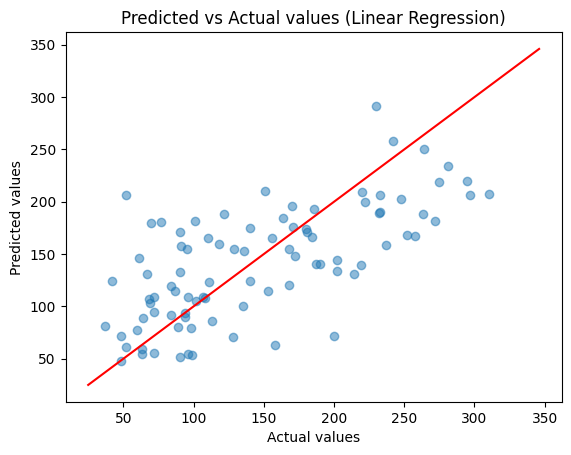

In [13]:
import matplotlib.pyplot as plt

# We will plot the predicted vs the actual values
# predicted values of the model will be ploted on the X axis
# actual values will be ploted on the Y axis
# in good fit the points should be close to the diagonal 

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()],[y.min(), y.max()], color="red")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual values (Linear Regression)")
plt.show()

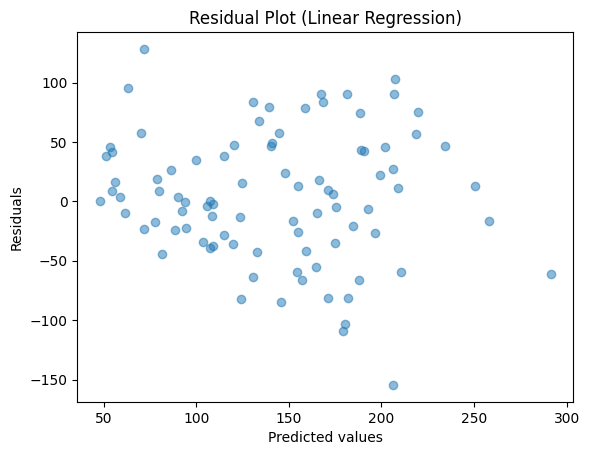

In [14]:
# Plot the residuals
# The residuals are ploted against the predicted values of the target variable
# If the linear regression model is a good fit for the data
# The residual plot should show a random scatter of the points around zero
# with no discernable trend


plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()

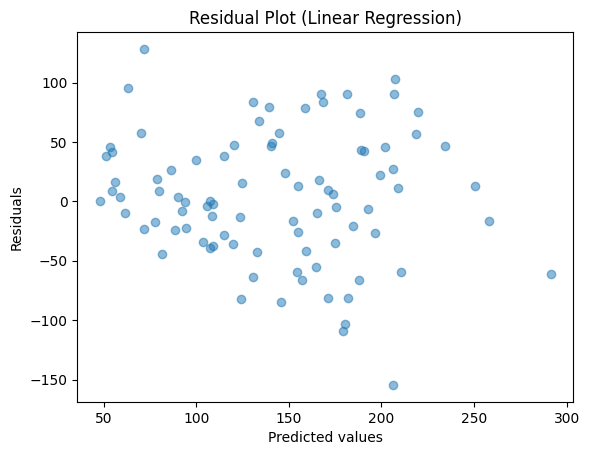

In [15]:
# Plot the residuals
# The residuals are ploted against the predicted values of the target variable
# If the linear regression model is a good fit for the data
# The residual plot should show a random scatter of the points around zero
# with no discernable trend


plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()